# 解き方の仮説
1. センサデータに被りがないので推測はセンサ値の含まれる値の範囲から算出できる
2. センサデータは被る．irのみあるいはlidarの被っていないデータを200~1000まで全てまとめてからベイズで解く
3. センサデータはir,lidarともに被る．ir,lidarの200~1000のデータをすべてまとめてからベイズで解く

# 検証方法
1. ir,lidarのデータの被りを検証
2. それぞれの場合に応じて解く

# 実際の解き方
本の式(2.57),(2.58)より
\begin{eqnarray}
    P(t|z_1,z_2,z_3) &=& \eta P(z_1,z_2,z_3|t) \\
    &=& \eta P(z_1|t)P(z_2|t)P(z_3|t)P(t)    
\end{eqnarray}

ir とlidarのセンサデータからどのセンサデータなのか推定したいので，以下のように変更

$$
    P(t|z_1,z_2)= \eta P(z_1|t)P(z_2|t)P(t)
$$

ここで，$z_1$がirのセンサデータ，$z_2$がlidarのセンサデータ，$t$がセンサデータのラベルとしている

# 備考
- "sensor_data_1000.txt"だけデータがおかしいので，除外
- 数式の書き方は[ここ](https://qiita.com/namoshika/items/63db972bfd1030f8264a)を参照
- jupyternotebookでの文章の書き方は[ここ](https://myenigma.hatenablog.com/entry/2016/02/20/183423#Markdown%E3%81%A7%E6%96%87%E7%AB%A0%E3%82%92%E5%85%A5%E5%8A%9B%E3%81%99%E3%82%8B)を参照

In [103]:
# データを結合

import pandas as pd    ###dataread###（1〜4行目と出力の上5行くらいを図示）

data200  = pd.read_csv("sensor_data_200.txt", delimiter=" ", header=None, names = ("date","time","ir","lidar"))
data200["dataNo"] = 200
data280  = pd.read_csv("sensor_data_280.txt", delimiter=" ", header=None, names = ("date","time","ir","lidar"))
data280["dataNo"] = 280
data300  = pd.read_csv("sensor_data_300.txt", delimiter=" ", header=None, names = ("date","time","ir","lidar"))
data300["dataNo"] = 300
data400  = pd.read_csv("sensor_data_400.txt", delimiter=" ", header=None, names = ("date","time","ir","lidar"))
data400["dataNo"] = 400
data500  = pd.read_csv("sensor_data_500.txt", delimiter=" ", header=None, names = ("date","time","ir","lidar"))
data500["dataNo"] = 500
data600  = pd.read_csv("sensor_data_600.txt", delimiter=" ", header=None, names = ("date","time","ir","lidar"))
data600["dataNo"] = 600
data700  = pd.read_csv("sensor_data_700.txt", delimiter=" ", header=None, names = ("date","time","ir","lidar"))
data700["dataNo"] = 700

D = pd.concat([data200,data280,data300,data400,data500,data600,data700])

In [104]:
dataNo = [200,280,300,400,500,600,700]

each_data_lidar = {i:d.lidar.get_group(i).value_counts().sort_index() for i in dataNo}
freqs_lidar = pd.concat(each_data_lidar,axis=1)
freqs_lidar = freqs_lidar.fillna(0)
probs_lidar = freqs_lidar/len(D)

each_data_ir = {i:d.ir.get_group(i).value_counts().sort_index() for i in dataNo}
freqs_ir = pd.concat(each_data_ir,axis=1)
freqs_ir = freqs_ir.fillna(0)
probs_ir = freqs_ir/len(D)

p_dataNo = pd.DataFrame(probs_lidar.sum())

cond_lidar_dataNo = probs_lidar/p_dataNo[0]
cond_ir_dataNo = probs_ir/p_dataNo[0]

In [133]:
def bayes_est(dataNo, v_lidar, v_ir, p_dataNo, cond_lidar_dataNo, cond_ir_dataNo):
    n_est = []
    for i in dataNo:
        n_est.append(cond_lidar_dataNo[i][v_lidar] * cond_ir_dataNo[i][v_ir] * p_dataNo[i])
    
    return n_est/sum(n_est)

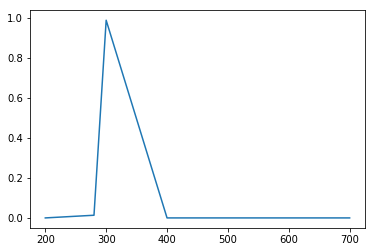

In [140]:
est = bayes_est(dataNo,300, 120, p_dataNo[0], cond_lidar_dataNo, cond_ir_dataNo)
plt.plot(dataNo, est)

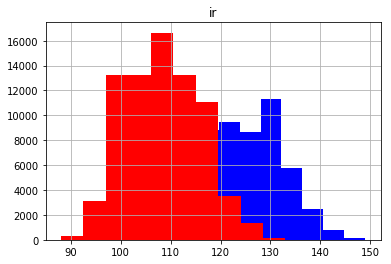

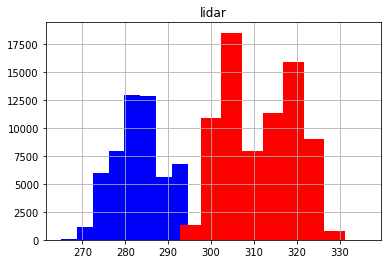

In [136]:
import matplotlib.pyplot as plt

d=D.groupby("dataNo")
d.ir.get_group(280).hist(color="blue")
d.ir.get_group(300).hist(color="red")
plt.title("ir")
plt.show()
d.lidar.get_group(280).hist(color="blue")
d.lidar.get_group(300).hist(color="red")
plt.title("lidar")
plt.show()

In [63]:
import pandas as pd    ###dataread###（1〜4行目と出力の上5行くらいを図示）
dataLst=[]
dataNameLst = ["sensor_data_200.txt","sensor_data_280.txt", "sensor_data_300.txt","sensor_data_400.txt","sensor_data_500.txt",
               "sensor_data_600.txt","sensor_data_700.txt"]
dataLst = [pd.read_csv("{}".format(n), delimiter=" ", header=None, names = ("date","time","ir","lidar")) for n in dataNameLst]


In [64]:
def plot_sensor_lidar(dataLst,dataNameLst):
    import matplotlib.pyplot as plt
    
    [dataLst[i]["lidar"].hist(bins = max(dataLst[i]["lidar"]) - min(dataLst[i]["lidar"]),align='left') for i in range(len(dataLst))]
     
    plt.show()

In [66]:
def plot_sensor_ir(dataLst,dataNameLst):
    import matplotlib.pyplot as plt
    
    [dataLst[i]["ir"].hist(bins = max(dataLst[i]["ir"]) - min(dataLst[i]["ir"]),align='left') for i in range(len(dataLst))]
     
    plt.show()

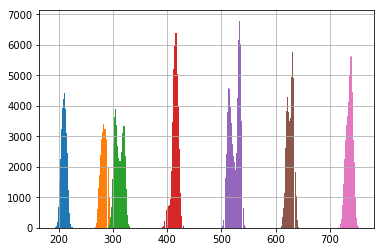

In [65]:
plot_sensor_lidar(dataLst ,dataNameLst)

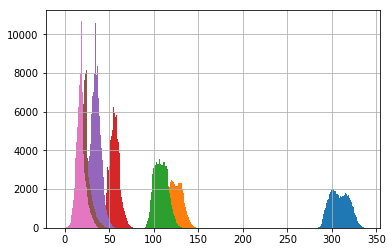

In [67]:
plot_sensor_ir(dataLst,dataNameLst)

In [ ]:

import matplotlib.pyplot as plt
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax1=data200["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align='left')
ax1.set_title("lidar 200.txt")
ax2=fig.add_subplot(1,2,2)
ax2=data200["ir"].hist(bins = max(data["ir"]) - min(data["ir"]),align='left')
ax2.set_title("ir 200.txt")
plt.show()


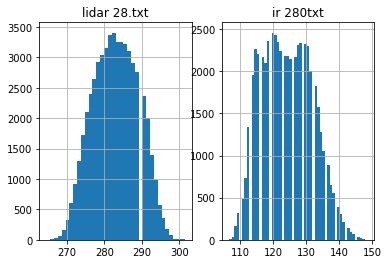

In [16]:
data280  = pd.read_csv("sensor_data_280.txt", delimiter=" ",  header=None, names = ("date","time","ir","lidar"))
import matplotlib.pyplot as plt
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax1=data280["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align='left')
ax1.set_title("lidar 280txt")
ax2=fig.add_subplot(1,2,2)
ax2=data280["ir"].hist(bins = max(data["ir"]) - min(data["ir"]),align='left')
ax2.set_title("ir 280txt")
plt.show()

In [4]:
mean1 = sum(data["lidar"].values)/len(data["lidar"].values)   ###calcmean###
mean2 = data["lidar"].mean()
print(mean1,mean2)

209.73713297619855 209.73713297619855


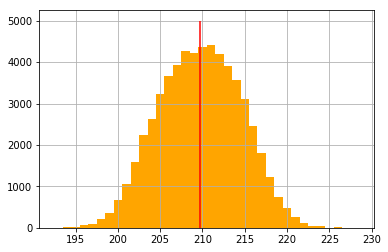

In [5]:
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),color="orange",align='left')   ###avgplot###
plt.vlines(mean1,ymin=0,ymax=5000,color="red")
plt.show()

In [6]:
# 定義から計算　                     ### calcvar
zs = data["lidar"].values  
mean = sum(zs)/len(zs)
diff_square = [ (z - mean)**2 for z in zs]

sampling_var = sum(diff_square)/(len(zs))     # 標本分散
unbiased_var = sum(diff_square)/(len(zs)-1) # 不偏分散

print(sampling_var)
print(unbiased_var)

# Pandasを使用
pandas_sampling_var = data["lidar"].var(ddof=False) # 標本分散
pandas_default_var = data["lidar"].var()        # デフォルト（不偏分散）

print(pandas_sampling_var)
print(pandas_default_var)

# NumPyを使用
import numpy as np

numpy_default_var = np.var(data["lidar"])  # デフォルト（標本分散）
numpy_unbiased_var = np.var(data["lidar"], ddof=1)  # 不偏分散

print(numpy_default_var)
print(numpy_unbiased_var)

23.407709770274106
23.40810659855441
23.4077097702742
23.408106598554504
23.4077097702742
23.408106598554504


In [7]:
import math ###  calcstddev

# 定義から計算
stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbiased_var)

# Pandasを使用 
pandas_stddev = data["lidar"].std()

print(stddev1)
print(stddev2)
print(pandas_stddev)

4.838151482774605
4.83819249292072
4.838192492920729


In [8]:
freqs = pd.DataFrame(data["lidar"].value_counts())  ###freqs###
freqs.transpose() #横向きに出力してみましょう

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [9]:
freqs["probs"] = freqs["lidar"]/len(data["lidar"]) ###addprobs###
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [10]:
sum(freqs["probs"])  ###confirmsum###

1.0

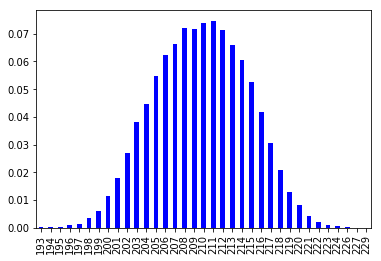

In [11]:
freqs["probs"].sort_index().plot.bar(color="blue")   ###probdist###
plt.show()

In [12]:
def drawing(): #ややこしいので関数として定義  ###one_sampling###
    return freqs.sample(n=1, weights="probs").index[0]

drawing() # 実行

210

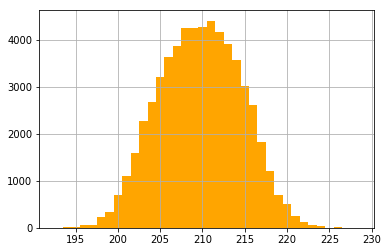

In [13]:
samples = [ drawing() for i in range(len(data))] ### sampling_simulation ###
#samples = [ drawing() for i in range(100)] #コーディング中は1行目の代わりにこちらを使う
simulated = pd.DataFrame(samples, columns=["lidar"])
p = simulated["lidar"]
p.hist(bins = max(p) - min(p),color="orange",align='left')  
plt.show()

In [14]:
def p(z, mu=209.7, dev=23.4):   ###pdf_from_def###
    return math.exp(-(z - mu)**2/(2*dev))/math.sqrt(2*math.pi*dev)

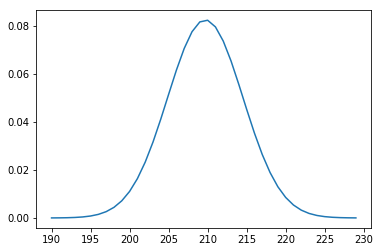

In [15]:
zs = range(190,230)   ###pdf_plot_from_def###
ys = [p(z) for z in zs]

plt.plot(zs,ys)
plt.show()

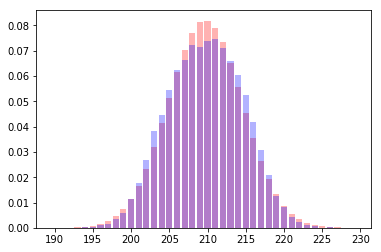

In [16]:
def prob(z,width=0.5):                                     ###prob_plot_from_def###
    return width*( p(z-width) + p(z+width) )

zs = range(190,230)
ys = [prob(z) for z in zs]

plt.bar(zs,ys, color="red", alpha=0.3) #alphaでグラフを透明にできる
f = freqs["probs"].sort_index()
plt.bar(f.index, f.values, color="blue", alpha=0.3)
plt.show()

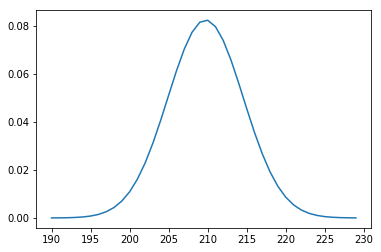

In [17]:
from scipy.stats import norm    ###pdf_plot_from_lib###

zs = range(190,230)
ys = [norm.pdf(z, mean1, stddev1) for z in zs]

plt.plot(zs,ys)
plt.show()

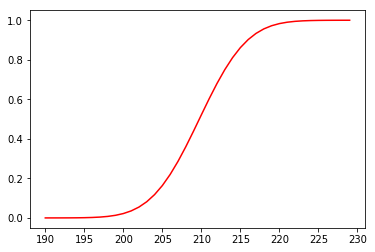

In [18]:
zs = range(190,230)                                ###cdf###
ys = [norm.cdf(z, mean1, stddev1) for z in zs]

plt.plot(zs,ys, color="red") 
plt.show()

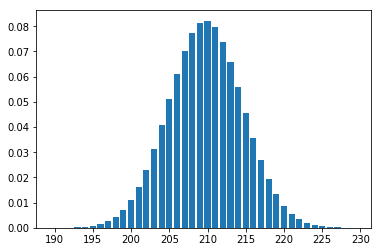

In [19]:
zs = range(190,230)              ###prob_cdf###
ys = [norm.cdf(z+0.5, mean1, stddev1) -  norm.cdf(z-0.5, mean1, stddev1) for z in zs]

plt.bar(zs,ys)
plt.show()

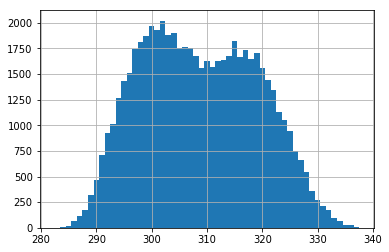

In [20]:
data["ir"].hist(bins = max(data["ir"]) - min(data["ir"]),align='left')
plt.show()

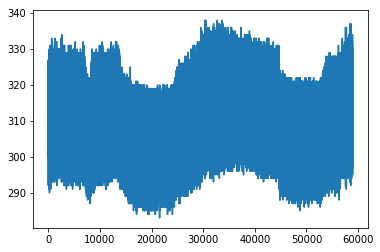

In [21]:
data.ir.plot()
plt.show()